### 16.2

#### Morphological opening and binary run-length code

How many foreground pixels are there in the resulting image?

Coordinates filled with 1s: [(3, 4), (3, 5), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (6, 5), (6, 6), (6, 7), (6, 8), (7, 6), (7, 7)]
Number of foreground pixels after morphological opening: 16


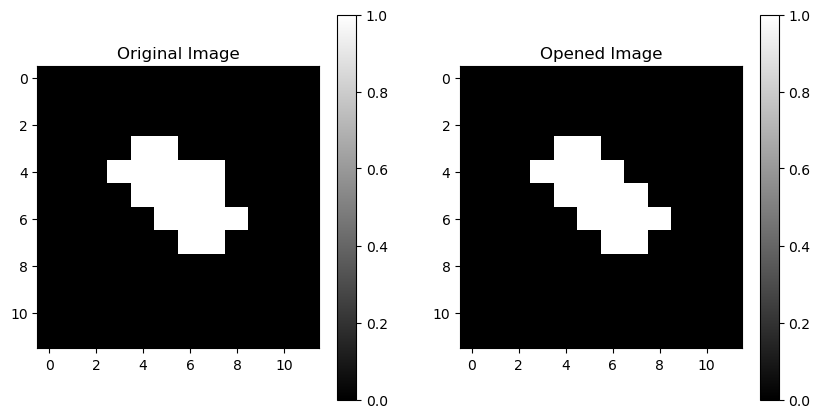

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation

# Create a 12x12 array filled with zeros
image = np.zeros((12, 12), dtype=int)

# List of run-length codes
run_lengths = [
    (3, (4, 5)),
    (4, (3, 7)),
    (5, (4, 7)),
    (6, (5, 8)),
    (7, (6, 7))
]

# Apply each run-length code to the image
for row, (start_col, end_col) in run_lengths:
    image[row, start_col:end_col+1] = 1

# Initialize a list to hold the coordinates
filled_coordinates = []

# Find all coordinates where the image has a value of 1
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] == 1:
            filled_coordinates.append((i, j))

# Output the filled coordinates
print("Coordinates filled with 1s:", filled_coordinates)

# Define the structuring element
structuring_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# Perform erosion
eroded_image = binary_erosion(image, structure=structuring_element)

# Perform dilation
opened_image = binary_dilation(eroded_image, structure=structuring_element)

# Count the foreground pixels in the resulting image
foreground_pixels_count = np.sum(opened_image)

# Output the number of foreground pixels
print("Number of foreground pixels after morphological opening:", foreground_pixels_count)

# Display the original and the opened image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(opened_image, cmap='gray', interpolation='nearest')
plt.title('Opened Image')
plt.colorbar()

plt.show()

In [2]:
from scipy.ndimage import median_filter

# Manually construct the 5x5 image matrix from the decoded description
image = np.array([
    [120, 120, 120, 110, 110],
    [120, 120, 110, 110, 110],
    [95,  95,  95, 95, 110],
    [110, 100,  100,  80,  80],
    [80,  80,  80,  80,  80]
])

# Apply the median filter with a size of 3x3
filtered_image = median_filter(image, size=3)

# Print the filtered image
print("Filtered Image:")
print(filtered_image)

# Print the value at the pixel (2, 2)
print("Value at pixel (2, 2):", filtered_image[2, 2])

Filtered Image:
[[120 120 120 110 110]
 [120 120 110 110 110]
 [110 100 100 100 110]
 [ 95  95  95  80  80]
 [ 80  80  80  80  80]]
Value at pixel (2, 2): 100


### 16.7
#### BLOB features and separation
Which set of BLOBfeatures can be used to seperate the 6 BLOBs in Figure 2. 
1. Area and bounding box ratio 
2. compactness and circularity 
3. bounding box ratio and circularity 
4. Area and compactness 
5. compactness and bounding box ratio



![alt text](<Images/Screenshot 2024-04-25 112523.png>)

Area and compactness (Option 4) could be a good choice, as it distinguishes blobs based on both size and how much they differ from a circular shape. This can separate large round shapes from small round ones, and irregular shapes from regular ones.

### 16.8
#### Mean filter and Gamma correction

What is the result in the marked pixel?

In [3]:
from scipy.ndimage import correlate

# Original image matrix
matrix = np.array([[87, 178, 66],
                   [149, 227, 214],
                   [57, 245, 65]])

# Define the 3x3 mean filter kernel
mean_filter_kernel = np.ones((3, 3)) / 9

# Apply the mean filter to the image
mean_filtered_image = correlate(matrix, mean_filter_kernel)

# Perform gamma correction
gamma = 1.15
# Normalize the pixel values to [0, 1], apply gamma correction,
# and then rescale back to [0, 255]
gamma_corrected_image = (mean_filtered_image / 255) ** gamma * 255

# Ensuring the values are within the proper range and of integer type
gamma_corrected_image = np.clip(gamma_corrected_image, 0, 255).astype('uint8')

# Retrieve the value at position (1, 1) which corresponds to the original value 227
result_pixel_value = gamma_corrected_image[1, 1]

result_pixel_value


131

### 16.9 
#### Template Matching and correlation

A template matching is performed on the image in Figure 4(left) with a template image as seen in Figure 4 (right). In the pixel marked with a blue circle the correlation is 243387. What is the original pixel value in the pixel with a missing value?

In [4]:
from sympy import symbols, Eq, solve

# Initialize the missing value as a symbol
x = symbols('x')

# Given correlation score
correlation_score = 243387

# Known values from the image matrix and template
image_values = np.array([195, 181, 30, 203, 192, 127, 48, 70])  # Excluding np.nan
template_values = np.array([208, 233, 71, 231, 161, 139, 32, 25])  # Corresponding template values

# Calculate the sum of products for the known values
sum_known = np.sum(image_values * template_values)

# Set up the equation correlating the sum of the products to the correlation score
equation = Eq(sum_known + x * 244, correlation_score)

# Solve the equation for x
missing_value = solve(equation, x)
missing_value

[245]

### 16.10
#### Template Matching and normalized cross correlation 
A template matching is performed on the image in Figure 4(right) with a template image as seen in Figure 4 (left). What is the normalized cross correlation in the pixel marked with a green circle?

In [5]:
# Pixel values from the image matrix
image_pixels = np.array([87, 178, 66, 149, 227, 214, 57, 245, 65])

# Pixel values from the template
template_pixels = np.array([208, 233, 71, 231, 161, 139, 32, 25, 244])

# Calculate the numerator of the NCC formula: sum of products of corresponding pixels
numerator = np.sum(image_pixels * template_pixels)

# Calculate the denominator of the NCC formula: product of square roots of sum of squares
denominator = np.sqrt(np.sum(image_pixels**2) * np.sum(template_pixels**2))

# Calculate the NCC
ncc = numerator / denominator
ncc

C:\Users\Leuro\AppData\Local\Temp\ipykernel_36888\3404309244.py:11: RuntimeWarning: overflow encountered in scalar multiply
  denominator = np.sqrt(np.sum(image_pixels**2) * np.sum(template_pixels**2))


9.625117181155131

### 16.14
#### Bilinear Interpolation

What is the interpolated value in the point?

In [6]:
# Define the pixel coordinates and values
x1, y1 = 80, 60
x2, y2 = 81, 61
v11 = 15  # Value at (80, 60)
v12 = 23  # Value at (80, 61)
v21 = 24  # Value at (81, 60)
v22 = 11  # Value at (81, 61)

# Coordinates of the point where we need to find the pixel value
x, y = 80.1, 60.7

# Bilinear interpolation formula
def bilinear_interpolation(x, y, x1, x2, y1, y2, v11, v12, v21, v22):
    # Interpolation in x direction
    v_x_y1 = v11 + (v21 - v11) * ((x - x1) / (x2 - x1))
    v_x_y2 = v12 + (v22 - v12) * ((x - x1) / (x2 - x1))

    # Interpolation in y direction
    v_x_y = v_x_y1 + (v_x_y2 - v_x_y1) * ((y - y1) / (y2 - y1))
    return v_x_y

# Compute the interpolated value at the center point
interpolated_value = bilinear_interpolation(x, y, x1, x2, y1, y2, v11, v12, v21, v22)
interpolated_value

20.03000000000005

### 16.15
#### linear gray level mapping and 3x3 maximum-rank lter

the new maximum value in the image is 160 and the new minimum value in the image is 50. What will the value of the marked pixel be?

In [11]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

matrix = np.array([[208, 71, 244],
                   [231, 139, 124],
                   [32, 244, 204]])


img_float = img_as_float(matrix)

min_val = img_float.min()
max_val = img_float.max()
# Original min and max values
# old_min, old_max = matrix.min(), matrix.max()

# # New min and max values
min_desired = 50/255
max_desired = 160/255

img_out = ((max_desired- min_desired)/(max_val - min_val))*(img_float-min_val) + min_desired

scaled_matrix =img_as_ubyte(img_out)
# # Apply linear gray level mapping
# scaled_matrix = ((matrix - old_min) * (new_max - new_min) / (old_max - old_min)) + new_min

# Apply a 3x3 maximum-rank filter to the scaled image
from scipy.ndimage import maximum_filter

filtered_matrix = maximum_filter(scaled_matrix, size=3)

# The new scaled and filtered value of the original pixel 139
scaled_matrix, filtered_matrix, filtered_matrix[1, 1]

(array([[141,  70, 160],
        [153, 106,  98],
        [ 50, 160, 139]], dtype=uint8),
 array([[153, 160, 160],
        [160, 160, 160],
        [160, 160, 160]], dtype=uint8),
 160)

### 16.15
#### pixel classification and minimum distance classification

A pixel with the value 46 in the image will be classified as?

In [12]:
# Given tissue Hounsfield Units
tissue_types = {
    'Air': [-945, -1032, -990],
    'Soft Tissue': [-50, -45, -67],
    'Kidney': [30, 43, 37],
    'Liver': [50, 54, 58],
    'Bone': [210, 190, 230]
}

# Calculate mean Hounsfield Unit for each tissue type
mean_values = {tissue: np.mean(values) for tissue, values in tissue_types.items()}

# Given pixel value to classify
pixel_value = 46

# Calculate the absolute distance from the pixel value to each mean
distances = {tissue: abs(mean - pixel_value) for tissue, mean in mean_values.items()}

# Find the tissue type with the minimum distance
classified_tissue = min(distances, key=distances.get)

mean_values, distances, classified_tissue

({'Air': -989.0,
  'Soft Tissue': -54.0,
  'Kidney': 36.666666666666664,
  'Liver': 54.0,
  'Bone': 210.0},
 {'Air': 1035.0,
  'Soft Tissue': 100.0,
  'Kidney': 9.333333333333336,
  'Liver': 8.0,
  'Bone': 164.0},
 'Liver')

What is the class range for kidney?

In [13]:
# Mean values for relevant tissues
mean_soft_tissue = mean_values['Soft Tissue']
mean_kidney = mean_values['Kidney']
mean_liver = mean_values['Liver']

# Calculate midpoints
midpoint_soft_tissue_kidney = (mean_soft_tissue + mean_kidney) / 2
midpoint_kidney_liver = (mean_kidney + mean_liver) / 2

(midpoint_soft_tissue_kidney, midpoint_kidney_liver)

(-8.666666666666668, 45.33333333333333)

### 16.18
#### pixel classification and parametric classification

A parametric classification is conducted. A pixel with the value 120 in the image will be classified as?

In [14]:
# Given new pixel value for classification
new_pixel_value = 120

# Calculate the absolute distances from the new pixel value to each mean
parametric_distances = {tissue: abs(mean - new_pixel_value) for tissue, mean in mean_values.items()}

# Find the tissue type with the minimum distance
parametric_classified_tissue = min(parametric_distances, key=parametric_distances.get)

parametric_distances, parametric_classified_tissue

({'Air': 1109.0,
  'Soft Tissue': 174.0,
  'Kidney': 83.33333333333334,
  'Liver': 66.0,
  'Bone': 90.0},
 'Liver')

### 16.21
#### Transformation and midpoint

In [15]:
# Transformation matrices
A = np.array([[3, 2], [4, 1]])
B = np.array([[2, 1], [1, 3]])

# Original points
P1 = np.array([2, 3])
P2 = np.array([4, 2])

# Apply the first transformation
P1_prime = A @ P1
P2_prime = A @ P2

# Apply the second transformation
P1_double_prime = B @ P1_prime
P2_double_prime = B @ P2_prime

# Calculate the midpoint of the transformed points
midpoint = (P1_double_prime + P2_double_prime) / 2

P1_double_prime, P2_double_prime, midpoint

(array([35, 45]), array([50, 70]), array([42.5, 57.5]))

### 16.21
#### Vertical Prewitt flter 
What is the value of the marked pixel after fltration?

In [18]:
matrix = np.array([[0,0,0],
                   [244,202,173],
                   [124,245,193]])

# Vertical Prewitt filter kernel
kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

# Function to apply the vertical Prewitt filter to a specific pixel
def apply_prewitt_vertical(matrix, row, col):
    # Extract the 3x3 region centered at the specified pixel
    region = matrix[row-1:row+2, col-1:col+2]
    # Perform the convolution
    filtered_value = np.sum(region * kernel)
    return filtered_value

# Apply the filter to the marked pixel at position (1, 1)
filtered_pixel_value = apply_prewitt_vertical(matrix, 1, 1)
filtered_pixel_value

-2

### 16.23
#### binary chain coding

On this image a BLOB analysis is conducted with 4-connectivity. How many BLOBS are found in the image?

In [22]:
wa =[0.0538,0.0558,0.1861,-0.0596]
wa=sum(wa)
wb = [0.0089,0.0931,0.1093,0.0417]
wb=sum(wb)
wc = [0.2811,0.0445,0.3379,-0.4626]
wc=sum(wc)
wd=[0.0167,0.0698,0.1354,0.0403]
wd=sum(wd)

print(wa,wb,wc,wd)




0.23609999999999998 0.253 0.20089999999999997 0.2622


In [26]:
(np.power(3/14, 3))/(np.power(3/14, 3)+ (3/14*(8/14)*11/14))


0.09278350515463918